<a href="https://colab.research.google.com/github/caseyberger/introphysics/blob/main/Work_and_Conservative_Forces_S24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Introduction to colab

The first cell (block of code) just tells the computer what tools I want to use. In this case numpy will help us with math and matplotlib.pyplot will help us make plots. To run this line and load these tools into the program, you can do one of two things:

- Press the "play" button that appears in the upper left corner when you hover your mouse over the cell
- Select the cell and hit Shift+Enter (for a mac) or Ctrl+Shift+Enter (for a PC)

In [ ]:
#loading tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next section defines some functions for us. This is our way of loading equations into the computer. Let's create the first function together:

KineticEnergy: $$K = \frac{1}{2}m (v_{x}^{2} + v_{y}^2)$$

(Once we have created the function, run the cell where the functions are defined to load them into the program)

In [ ]:
#defining the kinetic energy function
def KineticEnergy(m,vx,vy):
  return 0.5*m*(vx**2 + vy**2)

Test the function we just wrote. What is the kinetic energy of something with no velocity? What about something with $v_{x} = 2, v_{y}=0$? Use the "+ Code" button to create a new code cell and plug these numbers in.

Below, I've defined some other functions we will be using today:

Position (can be used for x or y position):

$$y_{f} = y_{i} + v_{y,i}t + \frac{1}{2} a_{y}t^{2}$$

Velocity: $$v_{f} = v_{i} + a t $$

WorkDone: $$W = K_{f}-K_{i}$$

In [ ]:
def position(s0, v0, a, t):
  s = s0 + v0*t + 0.5*a*t**2
  return s

def velocity(v0,a,t):
  v = v0 + a*t
  return v

def WorkDone(K0,Kf):
  W = Kf - K0
  return W

## Plotting: Parabolic Motion, Work, and Kinetic Energy

Let's discuss the well-known example of throwing a ball. The ball starts with some initial position $(x_{0},y_{0})$ and some initial velocity $\vec{v} = v_{x,0}\hat{x} + v_{y,0}\hat{y}$. Neglecting air resistance, the only acceleration is in the $\hat{y}$ direction, due to gravity $g$.

Below you can adjust the initial x position, y position, x velocity and y velocity to see different trajectories. Change these numbers around until your plot looks like the path of a ball being thrown straight up in the air.

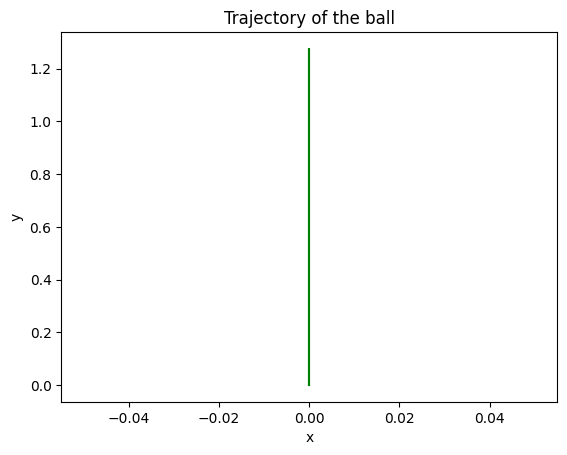

In [ ]:
#set your initial x, y, vx, and vy values
x0 = 0.0; y0 = 0.0; vx0 = 0.0; vy0 = 5.0;

#set the gravitational constant
g = 9.8 #this is the magnitude... don't forget direction!
start_time = 0.0; stop_time = 2*vy0/g; num_points = 50
time = np.linspace(start_time,stop_time,num_points)
x = position(x0,vx0,0,time)
y = position(y0,vy0,-g,time)#note the direction of the acceleration!
plt.plot(x,y,color = "green")
plt.xlabel('x')
plt.ylabel('y')
plt.title("Trajectory of the ball")
plt.show()

Small group tasks:

* Plot the kinetic energy of the ball along its trajectory (hint: you've already entered the initial conditions above)
* Can you identify where on the kinetic energy plot the ball is at the top of its trajectory?
* Plot the work done
* How does the plot of work done compare to the plot of the kinetic energy?
* How much total work is done from the start time to the top of the ball's trajectory? How much total work is done from the moment you throw the ball to the moment it returns to your hand?
* What is doing the work?



In this section, you can plot the kinetic energy of the ball as it goes up and then back down, using the function for kinetic energy we defined above.

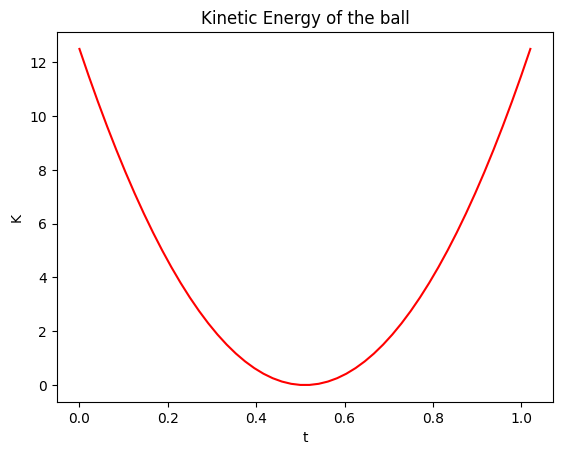

In [ ]:
#kinetic energy plot
m = 1.0
vy = velocity(vy0,-g,time)
vx = velocity(vx0,0,time)
K = KineticEnergy(m,vx,vy)
plt.plot(time,K,color = "red")
plt.xlabel('t')
plt.ylabel('K')
plt.title("Kinetic Energy of the ball")
plt.show()

And here we can plot the work. How does it compare to the kinetic energy?

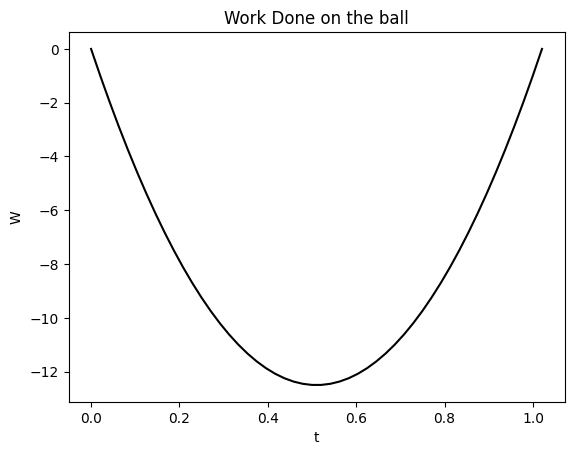

In [ ]:
#work plot
m = 1.0
vy = velocity(vy0,-g,time)
vx = velocity(vx0,0,time)
K0 = KineticEnergy(m,vx0,vy0)
K = KineticEnergy(m,vx,vy)
W = WorkDone(K0,K)
plt.plot(time,W,color = "black")
plt.xlabel('t')
plt.ylabel('W')
plt.title("Work Done on the ball")
plt.show()

This is the end of the small group section... if you've answered all the questions, try changing some of the parameters on the plots and see what changes. Or if you want some more advanced coding, try plotting the work and the kinetic energy on the same plot!

## Potential Energy

Let's define a new function below, based on the derivation for gravitational potential energy we just did.

In [ ]:
#define potential energy for gravity
def GravPotentialEnergy(m,g,y):
  return m*g*y

And now plot the gravitational potential energy. Make sure to enter the gravitational potential energy function you defined above.

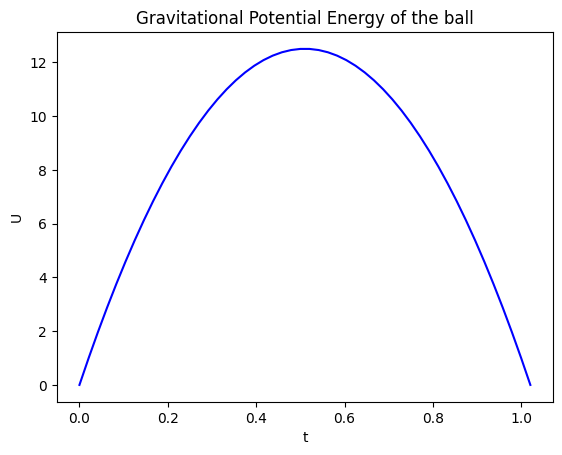

In [ ]:
#gravitational potential energy plot
U = GravPotentialEnergy(m,g,y)
plt.plot(time,U,color = "blue")
plt.xlabel('t')
plt.ylabel('U')
plt.title("Gravitational Potential Energy of the ball")
plt.show()

What do we notice when we plot both kinds of energy on top of each other?

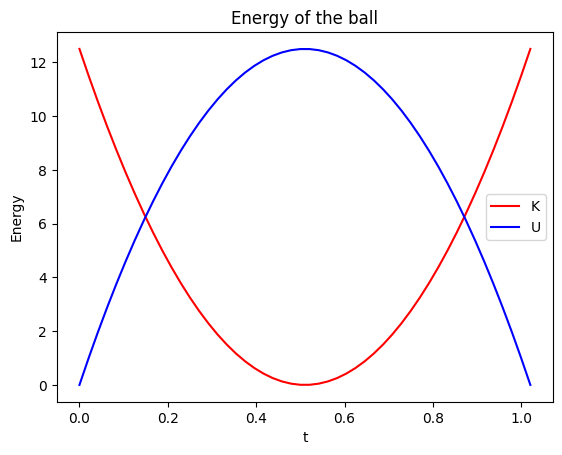

In [ ]:
#plotting kinetic and potential energy together
plt.plot(time,K,label = "K", color = "red")
plt.plot(time,U,label = "U", color = "blue")
plt.xlabel('t')
plt.ylabel('Energy')
plt.legend()
plt.title("Energy of the ball")
plt.show()

What if we plotted the total mechanical energy? $E = K + U$

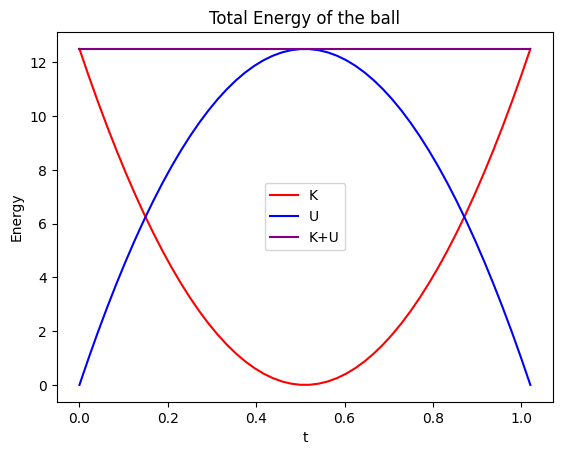

In [ ]:
#plotting total energy
plt.plot(time,K,label = "K", color = "red")
plt.plot(time,U,label = "U", color = "blue")
plt.plot(time,np.add(K,U),label = "K+U", color = "purple")
plt.xlabel('t')
plt.ylabel('Energy')
plt.legend()
plt.title("Total Energy of the ball")
plt.show()

##Animation: ball rolling down a hill

The next section animates a situation where a ball is rolling down a hill. To use animations, we have to load more tools in. Do this by running the next cell.

In [ ]:
#loading more tools for animation
from matplotlib import animation, rc
from IPython.display import HTML

And then run the cell below. It will take a while, but eventually an animation will appear below that you can run. What do you notice?

In [ ]:
#animating a ball rolling down the hill
hill_height = 1.
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax1 = plt.axes(xlim=(0, 2.5), ylim=(-0.2,1.5*hill_height))

lines = []
ball_obj = ax1.plot([],[],marker = 'o',markersize=15,color="red")[0]
lines.append(ball_obj)
hill_obj = ax1.plot([],[],lw=2,color="green")[0]
lines.append(hill_obj)

def barlist(y):
    m = 0.15
    g = 9.8
    U = m*g*y
    E = m*g*hill_height
    K = E - U
    return [U,K,E]

color_list = ["blue","red","purple"]
x_bar=[1.75,2.,2.25]
barcollection = ax1.bar(x_bar,barlist(hill_height),
                        width = 0.25, bottom = -0.2,
                        color = color_list,alpha = 0.5)
'''
def init():
    for line in lines:
        line.set_data([],[])
    return lines
'''
x1,y1 = [],[]
x2,y2 = [],[]

frame_num = 150

plt.close()

def hill(x,h):
  return np.piecewise(x,[x <=1.,x>1.],[lambda x: 0.5*h*(1+np.cos( np.pi * x)) ,lambda x: 0.])

def animate(i):

    x1 = 0.01*i
    y1 = hill(0.01 * i,hill_height)

    x2 = np.linspace(0,1.5,100)
    y2 = hill(x2,hill_height)-0.07

    xlist = [x1, x2]
    ylist = [y1, y2]

    E_data = barlist(y1)
    legend_list = ["U","K","E"]
    for j, b in enumerate(barcollection):
        b.set_height(E_data[j])
        b.set_label(legend_list[j])

    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately.
    return lines

# call the animator.  blit=True means only re-draw the parts that have changed.
#anim = animation.FuncAnimation(fig, animate, init_func=init,frames=frame_num, interval=20, blit=True)

anim = animation.FuncAnimation(fig, animate, frames=frame_num, interval=20, blit=True)

rc('animation', html='jshtml')
anim

<ipython-input-13-bcfe24b52c74>:61: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately.
<ipython-input-13-bcfe24b52c74>:61: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately.


In [ ]:
print(frame_num)

150


In [ ]:
print(np.shape(animate(1)))

(2,)


<ipython-input-12-21de81949061>:61: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately.
